<a href="https://colab.research.google.com/github/SanePai/Neural_Networks-Assignment-1/blob/master/Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd "/content/drive/My Drive/NNFL"
!ls

/content/drive/My Drive/NNFL
assignment1.pdf  data4.xlsx		   training_feature_matrix.xlsx
data2.xlsx	 test_feature_matrix.xlsx  training_output.xlsx
data3.xlsx	 test_output.xlsx


In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X1 = pd.read_excel("training_feature_matrix.xlsx", header=None)
Y1 = pd.read_excel("training_output.xlsx",header=None)

In [4]:
Y_mean = Y1.mean()
Y_std = Y1.std()
#Normalization
X1 = (X1 - X1.mean())/X1.std()
Y1 = (Y1-Y1.mean())/Y1.std()
X1 = np.array(X1)
Y1 = np.array(Y1)
m = len(X1) #Number of instances
col = np.ones((m,1)) 
X1 = np.concatenate((col,X1),axis=1)

In [5]:
X = X1.copy()
Y = Y1.copy()
k = 200 #Iterations
alpha = 0.0001 #Learning Rate
W_list = np.ones((k,3))
J_list = np.ones(k)
MSE_list = np.ones(k)

In [6]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
def hypothesis(w,X,m):
  '''Returns the hypothesis as a list for given weights'''
  h = []
  for i in range(0,m):
    h.append(w[0] + w[1]*X[i][1] + w[2]*X[i][2])
  return h

def update(w,alpha,m,X,Y,h):
  '''Updates the weights'''
  d0 = 0
  d1 = 0
  d2 = 0
  for i in range(0,m):
    d0 = d0 + ((h[i] - Y[i])*X[i][0])
  for i in range(0,m):
    d1 = d1 + ((h[i] - Y[i])*X[i][1])
  for i in range(0,m):
    d2 = d2 + ((h[i] - Y[i])*X[i][2])
  

  t0 = w[0] - alpha*d0
  t1 = w[1] - alpha*d1
  t2 = w[2] - alpha*d2
  
  w[0]=t0
  w[1]=t1
  w[2]=t2
  return w

def cost(h,y,m):
  #Calculate Cost
  j = 0
  for i in range(0,m):
    j = j + 0.5*(h[i]-y[i])**2
  return j  

def denormalize(data,avg,vari):
  '''Denormalize a list using the passed in mean and variation'''
  data1 = []
  for i in range(0,len(data)):
    data1.append((data[i]*vari) + avg)
  return data1

def calc_mse(m, h, y):
  '''Calculate the MSE for a given hypothesis and actual output'''
  add = 0
  for i in range(0,m):
    add = add + (h[i] - y[i])**2
  err = add/m
  return err


In [8]:
#Batch Gradient Descent
w = np.random.rand(3)
W_list[0] = w
for i in range(0,k):
  h = hypothesis(w,X,m)
  J_list[i] = cost(h,Y,m)
  w = update(w,alpha,m,X,Y,h)
  W_list[i][0] = w[0]
  W_list[i][1] = w[1]
  W_list[i][2] = w[2]
  MSE_list[i] = (calc_mse(m,denormalize(h,Y_mean,Y_std),denormalize(Y,Y_mean,Y_std)))

Text(0, 0.5, 'Cost')

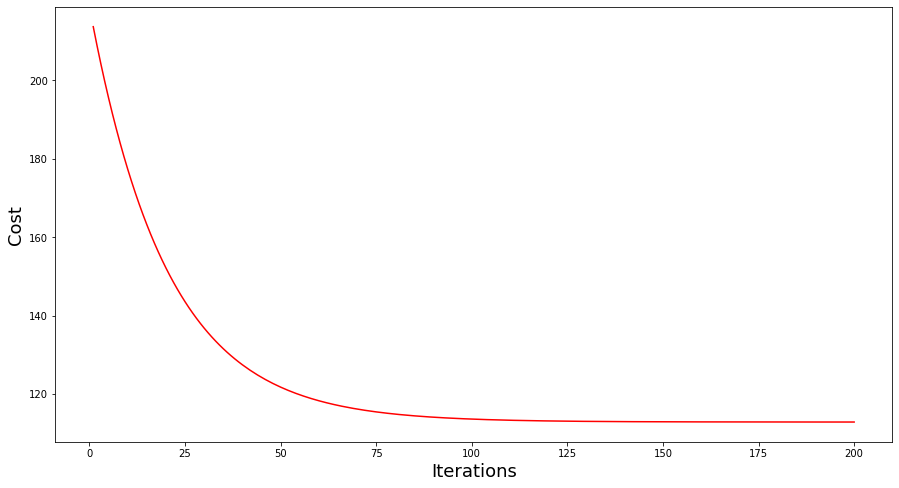

In [9]:
#Cost vs Iterations graph
plt.figure(figsize=(15,8))
g = plt.axes()
g.plot(range(1,k+1), J_list, 'red')
g.set_xlabel("Iterations", fontsize = 18)
g.set_ylabel("Cost", fontsize = 18)

In [10]:
print(W_list[-1]) #Final Weights

[0.00631462 0.04495034 0.25724827]


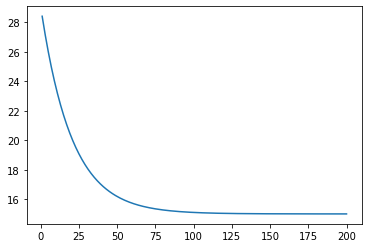

In [11]:
plt.plot(range(1,k+1),MSE_list) #MSE(Training) vs iterations

In [12]:
print(MSE_list[-1]) #Training MSE

15.006865734011106


In [13]:
#Using the hypothesis on the given test data
X1_test = pd.read_excel("test_feature_matrix.xlsx", header = None)
Y1_test = pd.read_excel("test_output.xlsx", header = None)
#Normalize
X1_test = (X1_test-X1_test.mean())/X1_test.std()
X1_test = np.array(X1_test)
Y1_test = np.array(Y1_test)
m_test = len(X1_test)
av = Y1_test.mean()
va = Y1_test.std()
col = np.ones((m_test,1)) 
X1_test = np.concatenate((col,X1_test),axis=1)
X_test = X1_test.copy()
Y_test = Y1_test.copy()

In [14]:
h_test = hypothesis(w,X_test,m_test)
mse = calc_mse(m_test,denormalize(h_test,av,va),Y_test)
print(mse)

[2.65093505]


In [15]:
print("Final weights: ", w)
print("Testing error(MSE): ", mse)

Final weights:  [0.00631462 0.04495034 0.25724827]
Testing error(MSE):  [2.65093505]


Text(0.5, 0.92, 'Cost vs weights')

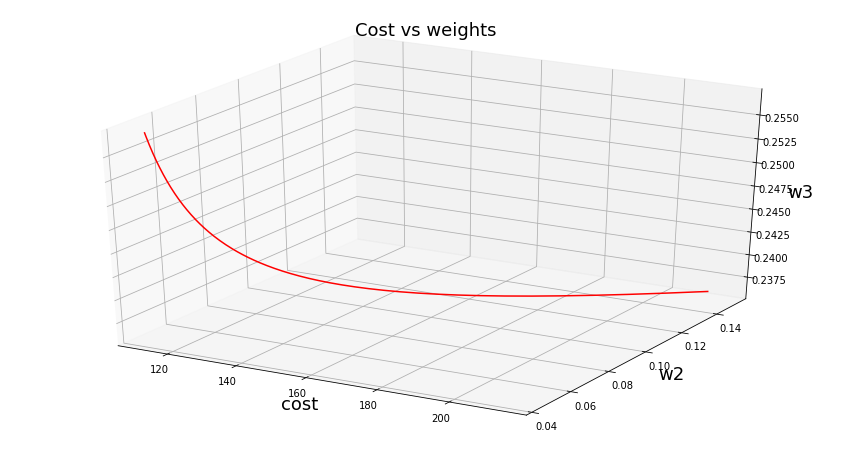

In [16]:
#Cost vs Weights(w2,w3)
plt.figure(figsize=(15,8))
gr = plt.axes(projection='3d')
gr.plot3D(J_list, W_list[:,1], W_list[:,2], 'red')
gr.set_xlabel("cost", fontsize = 18)
gr.set_ylabel("w2", fontsize = 18)
gr.set_zlabel("w3", fontsize = 18)
gr.set_title("Cost vs weights", fontsize = 18)